In [166]:
#reference >>> https://www.youtube.com/watch?v=F6GZdVemCxw&list=PLQ5j-FTc2VhDj93jQas0a8AvNfSMEiDxz
import gpxpy
import os
import pandas as pd
import matplotlib.pyplot as plt
import mplleaflet
import numpy as np
import folium
from IPython.display import display
import haversine as hs

plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

In [167]:
lst_fl = os.listdir()
lst_fl = [x for  x in lst_files if x.split('.')[-1]=='gpx']
lst_fl 

['workout-2022-02-16_18-53-220216.gpx']

In [168]:
with open(lst_files[0], 'r', encoding='utf-8') as gpx_fl:
    gpx = gpxpy.parse(gpx_fl)


In [169]:
gpx.get_track_points_no()

683

In [170]:
gpx.get_elevation_extremes()

MinimumMaximum(minimum=1030.0, maximum=1056.7142857142858)

In [171]:
gpx.get_uphill_downhill

<bound method GPX.get_uphill_downhill of GPX(tracks=[GPXTrack(name='220216', description='220216', number=0, segments=[GPXTrackSegment(points=[...])])])>

In [172]:
gpx.to_xml()[:1000]

'<?xml version="1.0" encoding="UTF-8"?>\n<gpx xmlns="http://www.topografix.com/GPX/1/1" xmlns:gpxtpx="http://www.garmin.com/xmlschemas/TrackPointExtension/v1" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.topografix.com/GPX/1/1 http://www.topografix.com/GPX/1/1/gpx.xsd" version="1.1" creator="FitoTrack">\n  <metadata>\n    <name>220216</name>\n    <desc>220216</desc>\n  </metadata>\n  <trk>\n    <name>220216</name>\n    <cmt>220216</cmt>\n    <desc>220216</desc>\n    <src>FitoTrack</src>\n    <number>0</number>\n    <type>running</type>\n    <trkseg>\n      <trkpt lat="-15.90453333" lon="-47.95188722">\n        <ele>1056.7142857142858</ele>\n        <extensions>\n          <speed>0.0</speed>\n          <gpxtpx:TrackPointExtension>\n            <gpxtpx:hr>-1</gpxtpx:hr>\n          </gpxtpx:TrackPointExtension>\n        </extensions>\n      </trkpt>\n      <trkpt lat="-15.90454056" lon="-47.95182688">\n        <ele>1056.5</ele>\n        <extensions>

In [173]:
gpx.tracks[0]

GPXTrack(name='220216', description='220216', number=0, segments=[GPXTrackSegment(points=[...])])

In [174]:
gpx.tracks[0].segments[0].points[:5]

[GPXTrackPoint(-15.90453333, -47.95188722, elevation=1056.7142857142858),
 GPXTrackPoint(-15.90454056, -47.95182688, elevation=1056.5),
 GPXTrackPoint(-15.90451278, -47.95177781, elevation=1056.3333333333333),
 GPXTrackPoint(-15.90445948, -47.95176035, elevation=1056.1),
 GPXTrackPoint(-15.90440714, -47.95175137, elevation=1055.8181818181818)]

In [175]:
route_info = []

for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            route_info.append({
                'latitude' : point.latitude,
                'longitude' : point.longitude,
                'elevation' : point.elevation,
            })

In [176]:
route_info[:3]

[{'latitude': -15.90453333,
  'longitude': -47.95188722,
  'elevation': 1056.7142857142858},
 {'latitude': -15.90454056, 'longitude': -47.95182688, 'elevation': 1056.5},
 {'latitude': -15.90451278,
  'longitude': -47.95177781,
  'elevation': 1056.3333333333333}]

In [177]:
route_df = pd.DataFrame(route_info)
route_df.head()

,latitude,longitude,elevation
0,-15.904533,-47.951887,1056.714286
1,-15.904541,-47.951827,1056.500000
2,-15.904513,-47.951778,1056.333333
3,-15.904459,-47.951760,1056.100000
4,-15.904407,-47.951751,1055.818182


In [178]:
route_df.to_csv('route_df.csv', index=False)

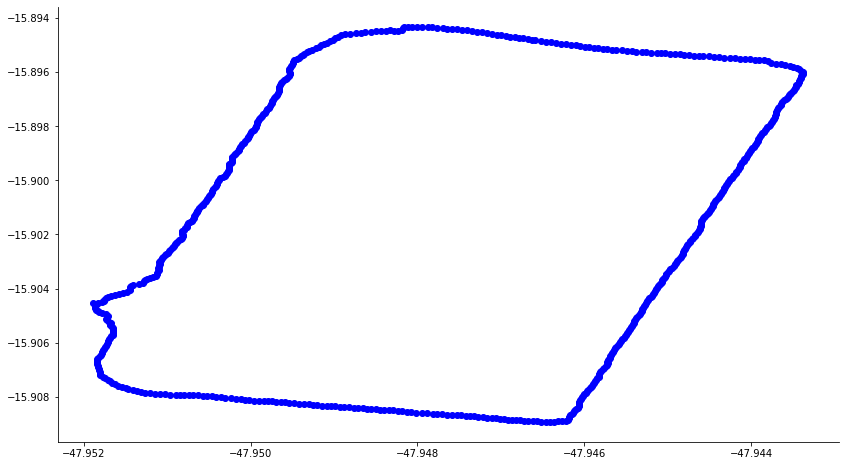

In [179]:
plt.figure(figsize=(14,8))
plt.scatter(route_df['longitude'], route_df['latitude'], color='blue')

In [180]:
#'OPENsTreetMap',
route_map = folium.Map(
    location= [-15.904634,-47.951831],
    zoom_start=15,
    titles= 'Stamen', 
    width = 1024,
    height= 600
)

for _, row in route_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius = 3
    ).add_to(route_map)

display(route_map)


In [181]:
coordinates = [tuple(x) for x in route_df[['latitude', 'longitude']].to_numpy()]

folium.PolyLine(coordinates, weight = 6).add_to(route_map)

In [182]:
route_df['elevation_diff'] = route_df['elevation'].diff()

In [183]:
route_df.head()

,latitude,longitude,elevation,elevation_diff
0,-15.904533,-47.951887,1056.714286,NaN
1,-15.904541,-47.951827,1056.500000,-0.214286
2,-15.904513,-47.951778,1056.333333,-0.166667
3,-15.904459,-47.951760,1056.100000,-0.233333
4,-15.904407,-47.951751,1055.818182,-0.281818


In [184]:
def haversine_distance(lat1, lon1, lat2, lon2) -> float:
    distance = hs.haversine(
        point1=(lat1, lon1),
        point2=(lat2, lon2),
        unit = hs.Unit.METERS
    )
    return np.round(distance, 2)

In [185]:
haversine_distance(
    lat1= route_df.iloc[0]['latitude'],
    lon1= route_df.iloc[0]['longitude'],
    lat2= route_df.iloc[1]['latitude'],
    lon2= route_df.iloc[1]['longitude'],
)

6.5

In [186]:
distances = [np.nan]

for i in range(len(route_df)):
    if i == 0:
        continue
    else:
        distances.append(haversine_distance(
            lat1= route_df.iloc[i - 1]['latitude'],
            lon1= route_df.iloc[i - 1]['longitude'],
            lat2= route_df.iloc[i]['latitude'],
            lon2= route_df.iloc[i]['longitude']
        ))

In [187]:
route_df['distance']= distances
route_df.head()

,latitude,longitude,elevation,elevation_diff,distance
0,-15.904533,-47.951887,1056.714286,NaN,NaN
1,-15.904541,-47.951827,1056.500000,-0.214286,6.50
2,-15.904513,-47.951778,1056.333333,-0.166667,6.09
3,-15.904459,-47.951760,1056.100000,-0.233333,6.21
4,-15.904407,-47.951751,1055.818182,-0.281818,5.90


In [188]:
route_df[route_df['elevation_diff'] >= 0]['elevation_diff'].sum()

79.39682539682553

In [189]:
route_df['distance'].sum()

4256.8

In [192]:
route_df['cum_elevation']= route_df['elevation_diff'].cumsum()
route_df['cum_distance']= route_df['distance'].cumsum()
route_df = route_df.fillna(0)
route_df.head()

,latitude,longitude,elevation,elevation_diff,distance,cum_elevation,cum_distance
0,-15.904533,-47.951887,1056.714286,0.000000,0.00,0.000000,0.00
1,-15.904541,-47.951827,1056.500000,-0.214286,6.50,-0.214286,6.50
2,-15.904513,-47.951778,1056.333333,-0.166667,6.09,-0.380952,12.59
3,-15.904459,-47.951760,1056.100000,-0.233333,6.21,-0.614286,18.80
4,-15.904407,-47.951751,1055.818182,-0.281818,5.90,-0.896104,24.70


Text(0, 0.5, 'ELEVATION IN METERS')

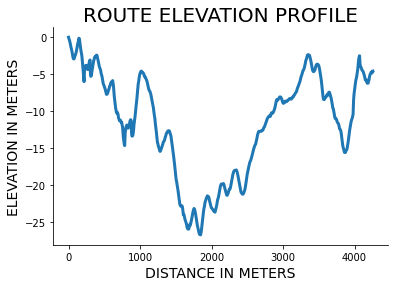

In [193]:
plt.plot(route_df['cum_distance'], route_df['cum_elevation'], lw=3)
plt.title('ROUTE ELEVATION PROFILE', size= 20)
plt.xlabel('DISTANCE IN METERS', size=14)
plt.ylabel('ELEVATION IN METERS', size=14)